# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 
Task: 
1. fitting it to the periodic function 
2. plot the fit 
Data 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


In [2]:
import numpy as np
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'min and max temperatures')

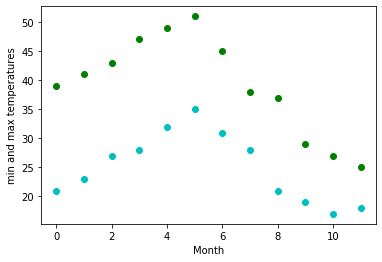

In [4]:
import matplotlib.pyplot as plt
months=np.arange(12)
plt.plot(months,temp_max,'go')
plt.plot(months,temp_min,'co')
plt.xlabel('Month')
plt.ylabel('min and max temperatures')

                 

In [8]:

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

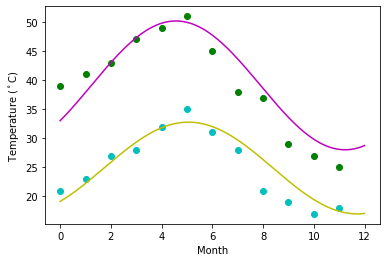

In [9]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [12]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url) 


In [13]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [31]:

fvsmc = titanic.groupby(['sex']).size()

# create a dataframe for the count and sex
fvsmcarr = []
fvsmcarr.append({'Sex': 'female', 'Count': fvsmc.female})
fvsmcarr.append({'Sex': 'male', 'Count': fvsmc.male})
fvsmcdf = pd.DataFrame(fvsmcarr)
fvsmcdf = fvsmcdf[['Sex','Count']]
fvsmcdf

,Sex,Count
0,female,466
1,male,843


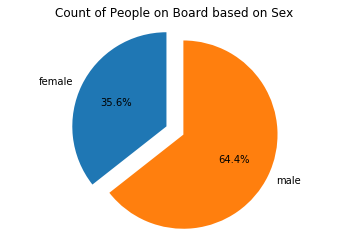

In [32]:
# pie chart for count and sex of passengers
fvsmfig, fvsmax = plt.subplots ()
fvsmax.pie(fvsmcdf['Count'],explode=[0.1,0.1], labels=(fvsmcdf['Sex']), autopct='%1.1f%%',startangle=90)
fvsmax.axis('equal')
fvsmpie = plt.title("Count of People on Board based on Sex")
plt.show()

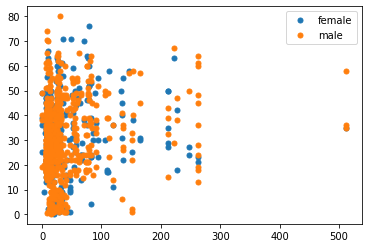

In [71]:
num = 1310
#x, y = np.random.random((2, num))
labels = np.random.choice(titanic['sex'], num)
df = pd.DataFrame(dict(x=titanic.fare, y=titanic.age, label=labels))
groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()